In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv('C:/Users/Lenovo/Desktop/Rental/airbnb/Listings/listings_clean_recent.csv')

In [2]:
print(df.head)

<bound method NDFrame.head of             id    host_id  host_since  host_response_time  host_response_rate  \
0        26654     113345       40293                   4                0.90   
1        51616     237587       40438                   4                0.90   
2        64003     312769       40520                   1                1.00   
3        96336     511506       40648                   4                1.00   
4        98136     518383       40651                  24                0.80   
5       104096     349172       40559                   1                1.00   
6       104722     455397       40623                  24                0.50   
7       112842     575127       40673                  48                0.00   
8       137099     149566       40351                  24                0.80   
9       138006     605569       40682                   1                1.00   
10      153000     735795       40717                   1                1.00  

In [3]:
####Clustering Begins Here
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
import math
%matplotlib inline
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred,
                y_real,
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y')
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred,
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')

    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')

    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')

    return ax1, ax2, ax3

In [5]:
class model:

    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None

    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)

    def score_reg(self):
        return self.train_score, self.test_score

    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log

    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test

    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)

def model_iterations(n, x, y, model_arg, log_bool=False):
    new_model = model(model_arg)
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print('Mean Train Score:', np.mean(training_scores))
    print('Mean Test Score:', np.mean(testing_scores))
    return new_model

In [6]:
non_num_vars = df.select_dtypes(include=['object']).columns
df[non_num_vars].head()

,neighbourhood,property_type,room_type,bed_type
0,Entertainment District,Condominium,Entire home/apt,Real Bed
1,Niagara,Condominium,Private room,Real Bed
2,Downtown Toronto,Townhouse,Entire home/apt,Real Bed
3,Niagara,Townhouse,Entire home/apt,Real Bed
4,Toronto Islands,House,Entire home/apt,Real Bed


In [7]:
dummy_vars = pd.get_dummies(df[non_num_vars])

In [8]:
df=df.drop(['neighbourhood','property_type','room_type','bed_type'],axis=1)
df= pd.merge(df,dummy_vars, left_index=True, right_index=True)
#df.to_csv("C:/Users/Lenovo/Desktop/Rental/airbnb/Listings/listings_clean_new.csv")

In [9]:
#df=pd.read_csv("C:/Users/Lenovo/Desktop/Rental/airbnb/Listings/listings_clean_new1.csv")
# split into x and y (note that we do not include id and host_id as predictors)
x = df.iloc[:, 2:-2]
y = df['price']
y_log = df['price_log']

In [10]:
print(x.head)



<bound method NDFrame.head of       host_since  host_response_time  host_response_rate  host_is_superhost  \
0          40293                   4                0.90                  0   
1          40438                   4                0.90                  1   
2          40520                   1                1.00                  1   
3          40648                   4                1.00                  1   
4          40651                  24                0.80                  0   
5          40559                   1                1.00                  0   
6          40623                  24                0.50                  0   
7          40673                  48                0.00                  0   
8          40351                  24                0.80                  0   
9          40682                   1                1.00                  1   
10         40717                   1                1.00                  0   
11         40678      

In [11]:
print(y.head)

<bound method NDFrame.head of 0       198
1        80
2       316
3       229
4       300
5       174
6       160
7        55
8       240
9        83
10      249
11       96
12      189
13      115
14      250
15      399
16       49
17      189
18      125
19      178
20       89
21      300
22      190
23      650
24      125
25      300
26      194
27      250
28      140
29      189
       ... 
4949    130
4950    549
4951     95
4952    101
4953     80
4954    180
4955     67
4956    190
4957    120
4958     71
4959    111
4960    140
4961    499
4962     59
4963     99
4964    160
4965     99
4966    129
4967     39
4968     99
4969    149
4970    198
4971     88
4972    111
4973    109
4974    150
4975    499
4976    150
4977    130
4978    100
Name: price, Length: 4979, dtype: int64>


In [12]:
####Ridge and Lasso Regression
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(1, x, y, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.99272e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.99016e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.81794e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.81486e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.82015e-29): result may not be accurate.
  

Mean Train Score: 1.0
Mean Test Score: 1.0


C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.1541e-25): result may not be accurate.
  overwrite_a=True).T


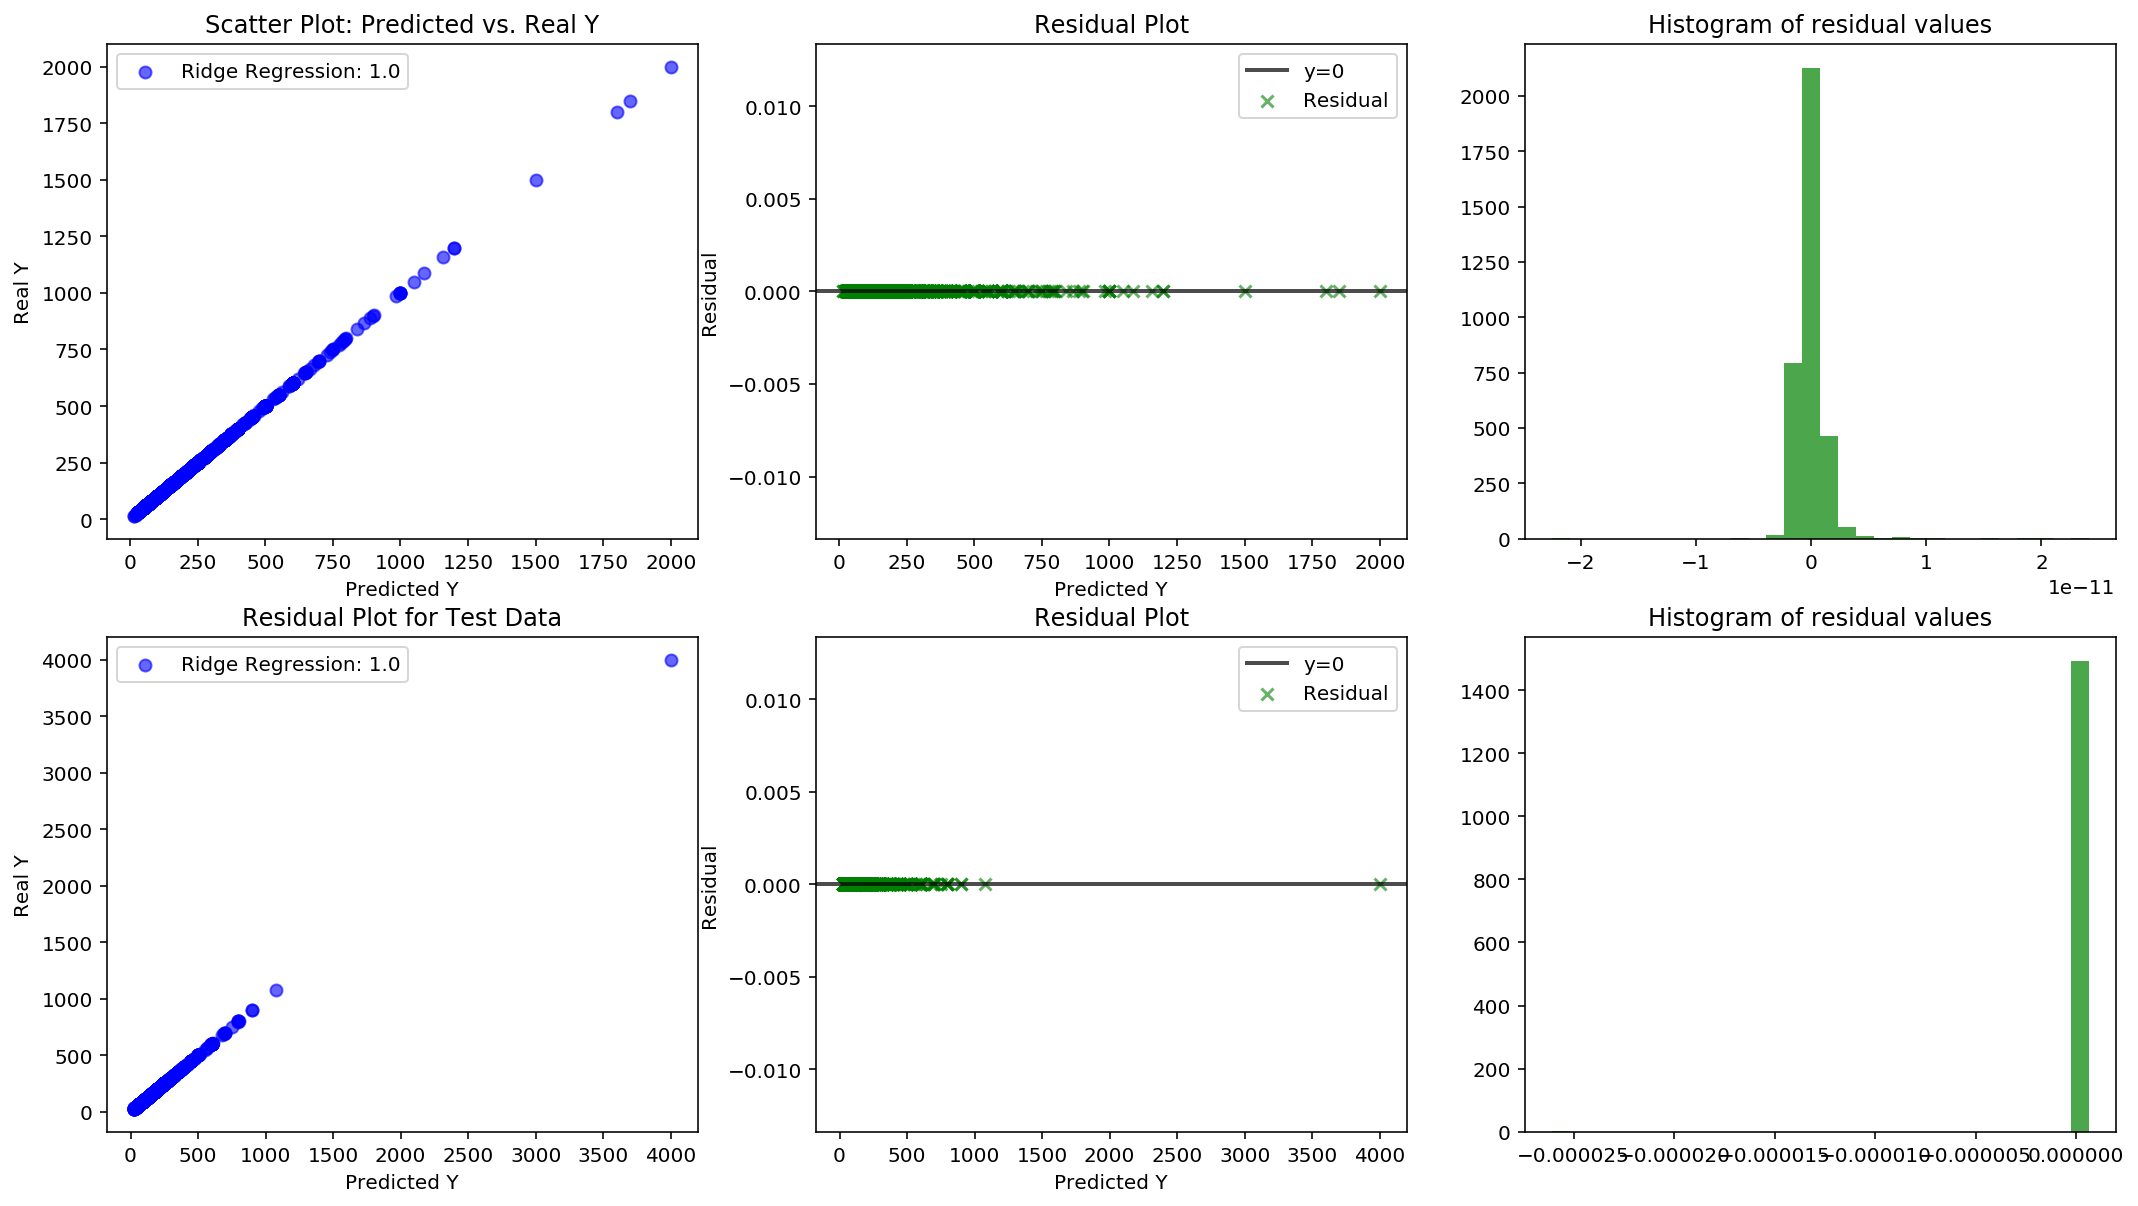

In [13]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

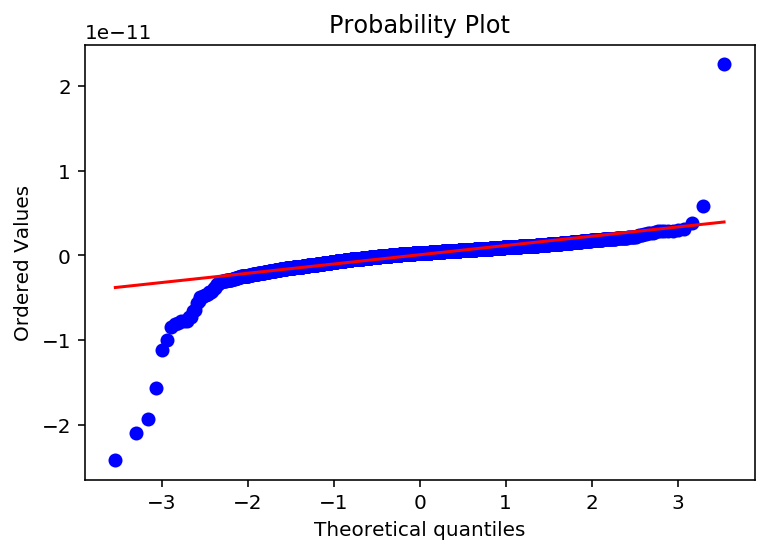

In [14]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [15]:
###Ridge Regression with Log Transform Response
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16881e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16865e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.1662e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.25982e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.97526e-25): result may not be accurate.
  o

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.19918e-28): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.19915e-28): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.00685e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.08786e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.84162e-26): result may not be accurate.
  

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.67291e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.15535e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.67327e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.67236e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.67327e-26): result may not be accurate.
  

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16913e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.00042e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16918e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16914e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16913e-24): result may not be accurate.
  

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.64268e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.11118e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.13787e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.15331e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.14344e-20): result may not be accurate.
  

Mean Train Score: 1.0
Mean Test Score: 1.0


C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.59957e-27): result may not be accurate.
  overwrite_a=True).T


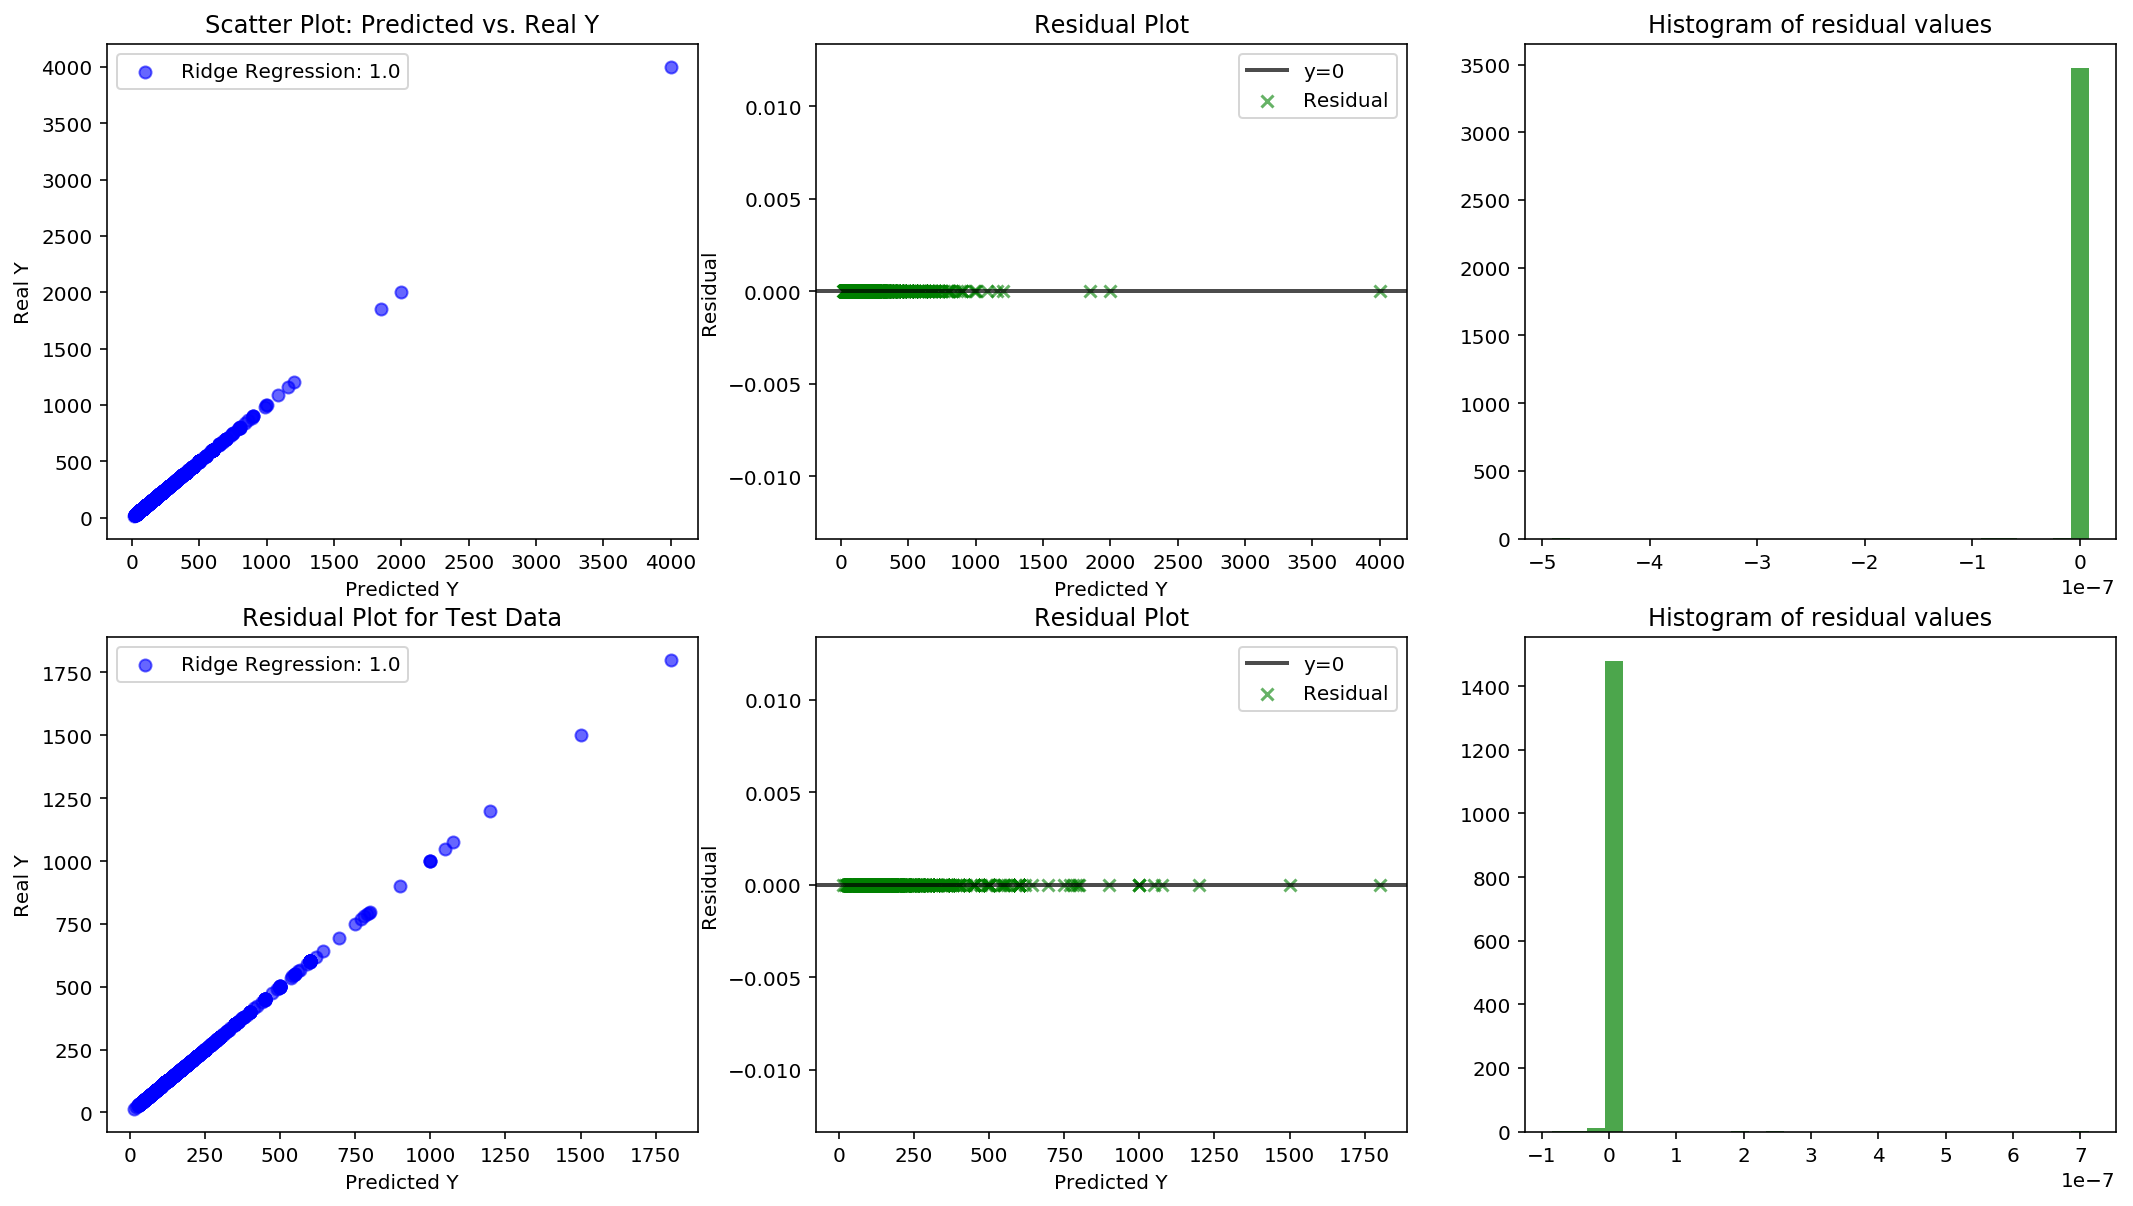

In [16]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

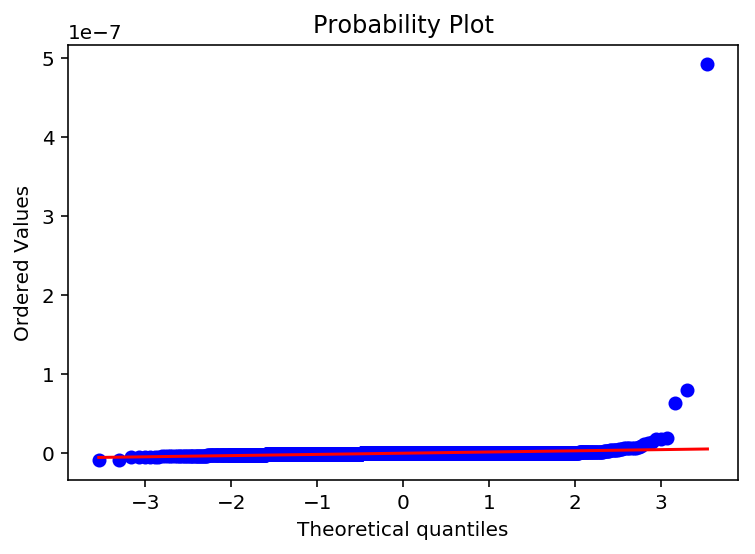

In [17]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [18]:
##lasso regression with untransformedresponse
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.999999999999677
Mean Test Score: 0.9999999999995802


In [19]:
###lasso with Log transformed Response
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y_log, LassoCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.9999999003290165
Mean Test Score: 0.99999939459071


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [21]:
####Analysis with Median Absolute Error
def mean_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ RandomForestRegressor(),GradientBoostingRegressor(),tree.DecisionTreeRegressor(),linear_model.LinearRegression(),linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Random Forest','Gradient Boosting','Decision Tree','Linear','Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.mean_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.mean_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)

    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Mean Absolute Error')
    plt.show()

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.65628e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.9795e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.81941e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1

Model Random Forest Results: 0.5094664371772806
Model Gradient Boosting Results: 0.8558559089835682
Model Decision Tree Results: 0.5857716580608147
Model Linear Results: 5.133397454167331e-10
Model Ridge Results: 1.947450205400506e-06
Model RidgeCV Results: 1.7242035703570167e-08
Model Lasso Results: 0.003977956746862832
Model LassoCV Results: 4.248420888026264e-05
Model ElasticNet Results: 0.003964083700715554
Model BayesRidge Results: 0.0010610676152386746
Model OMP Results: 1.8214536782662636e-13


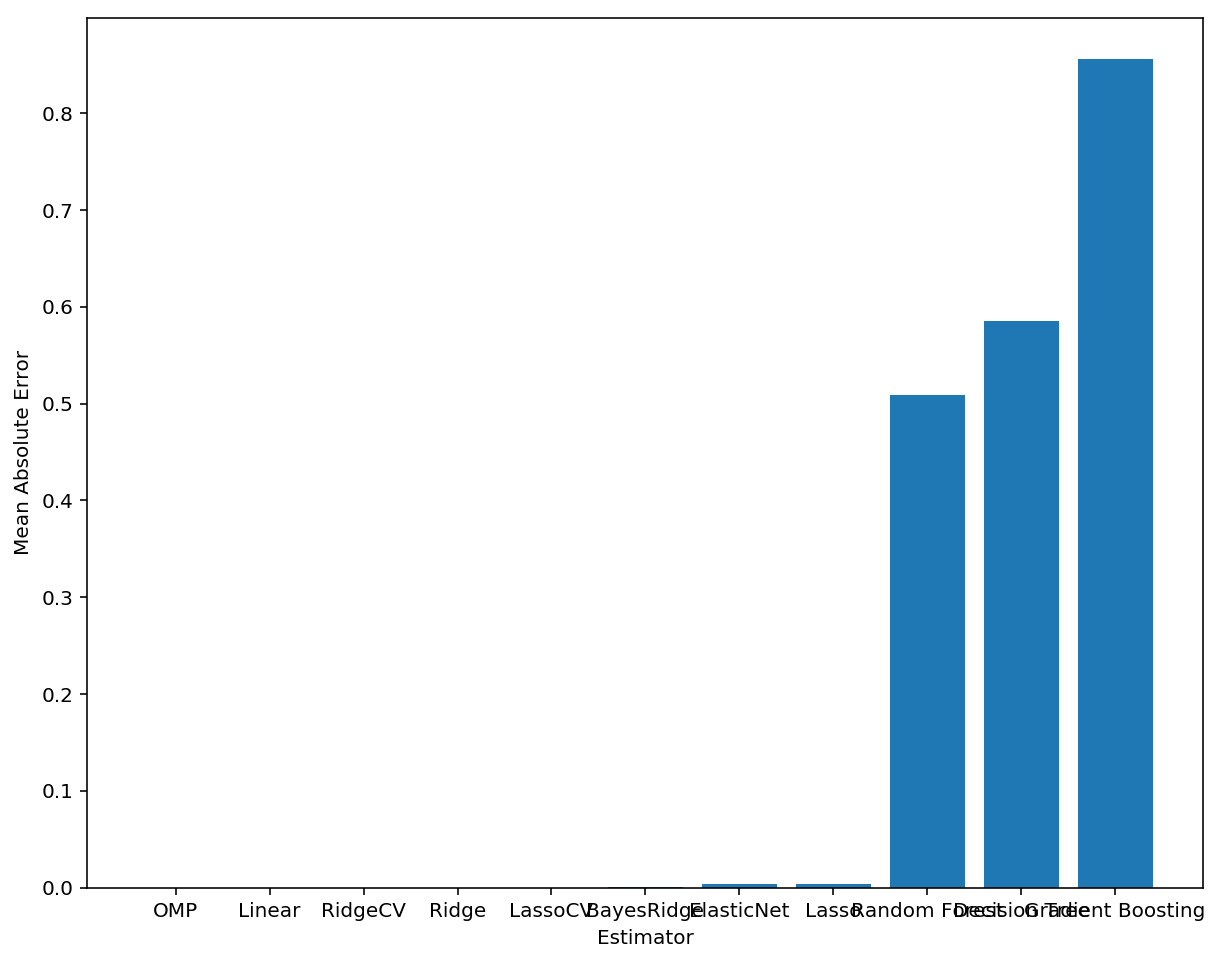

In [22]:
###MAE Untransformed Response
mean_absolute_errors(x, y)

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.65628e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.9795e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.81941e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


Model Random Forest Results: 0.444126733929823
Model Gradient Boosting Results: 0.5796278489993933
Model Decision Tree Results: 0.4463568547940605
Model Linear Results: 1.5277212112027185e-07
Model Ridge Results: 0.14103478142091774
Model RidgeCV Results: 8.382595242304126e-08
Model Lasso Results: 45.94394997137545
Model LassoCV Results: 0.005791094981293043
Model ElasticNet Results: 45.78781196332707
Model BayesRidge Results: 0.008056632841189732
Model OMP Results: 1.8287303207409152e-13


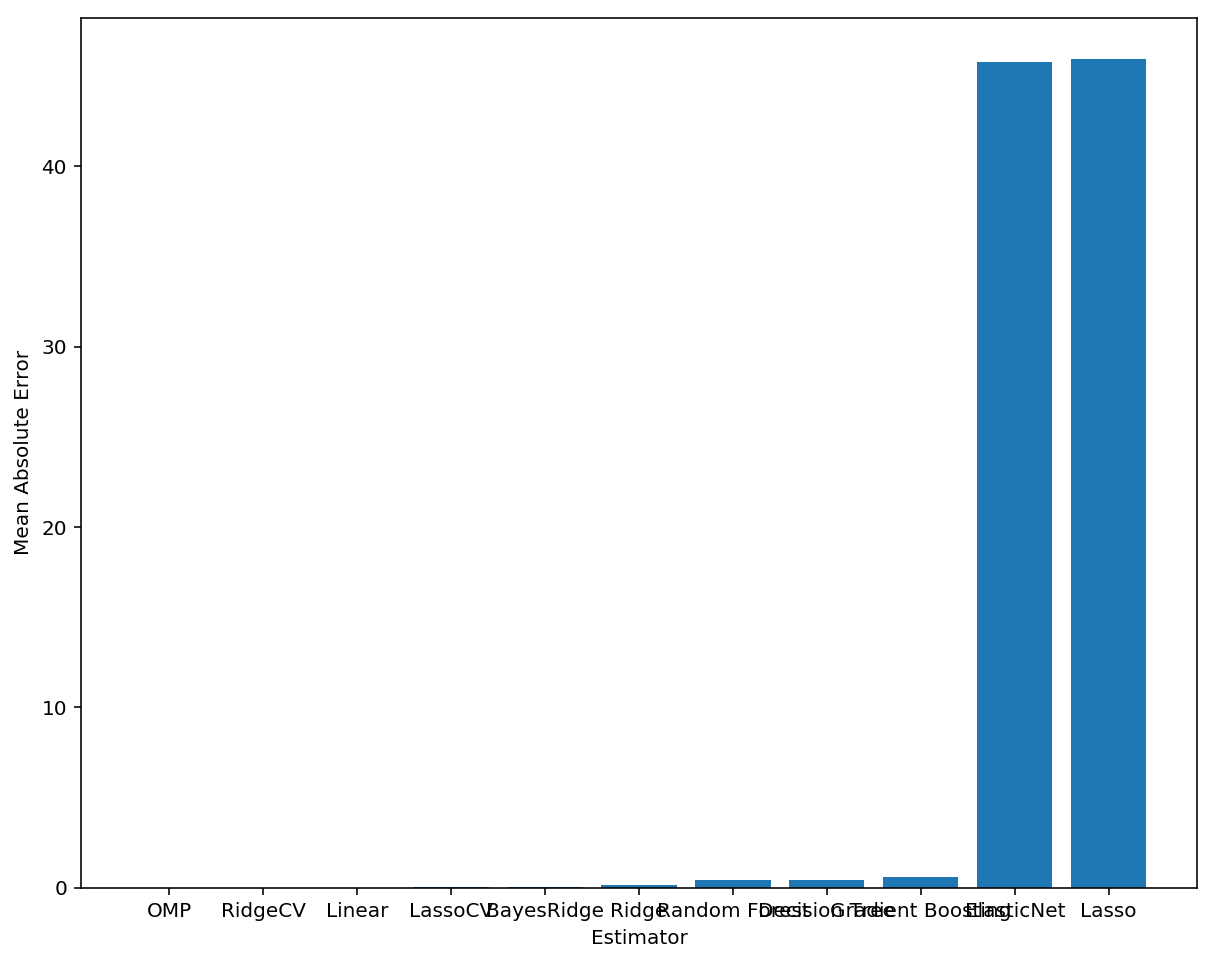

In [23]:
###MAE Log Transformed Response
mean_absolute_errors(x, y_log, True)

In [24]:
####Clustering Single Listing House Data
data_single = df[df['beds'] == min(df['beds'])]

# split into x_1 and y_1 (note that we do not include id and host_id as predictors)
x_1 = data_single.iloc[:, 2:-2]
y_1 = data_single['price']
y_1_log = data_single['price_log']

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.13615e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.13615e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.30443e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=

Model Random Forest Results: 1.665499351491569
Model Gradient Boosting Results: 1.433902224550028
Model Decision Tree Results: 0.6005188067444877
Model Linear Results: 3.13178945235649e-11
Model Ridge Results: 8.664440079548597e-06
Model RidgeCV Results: 4.972545507792969e-09
Model Lasso Results: 0.007761550438703474
Model LassoCV Results: 7.6632558301396e-05
Model ElasticNet Results: 0.007757832936138173
Model BayesRidge Results: 0.00021840725881641947
Model OMP Results: 8.533424723437935e-14


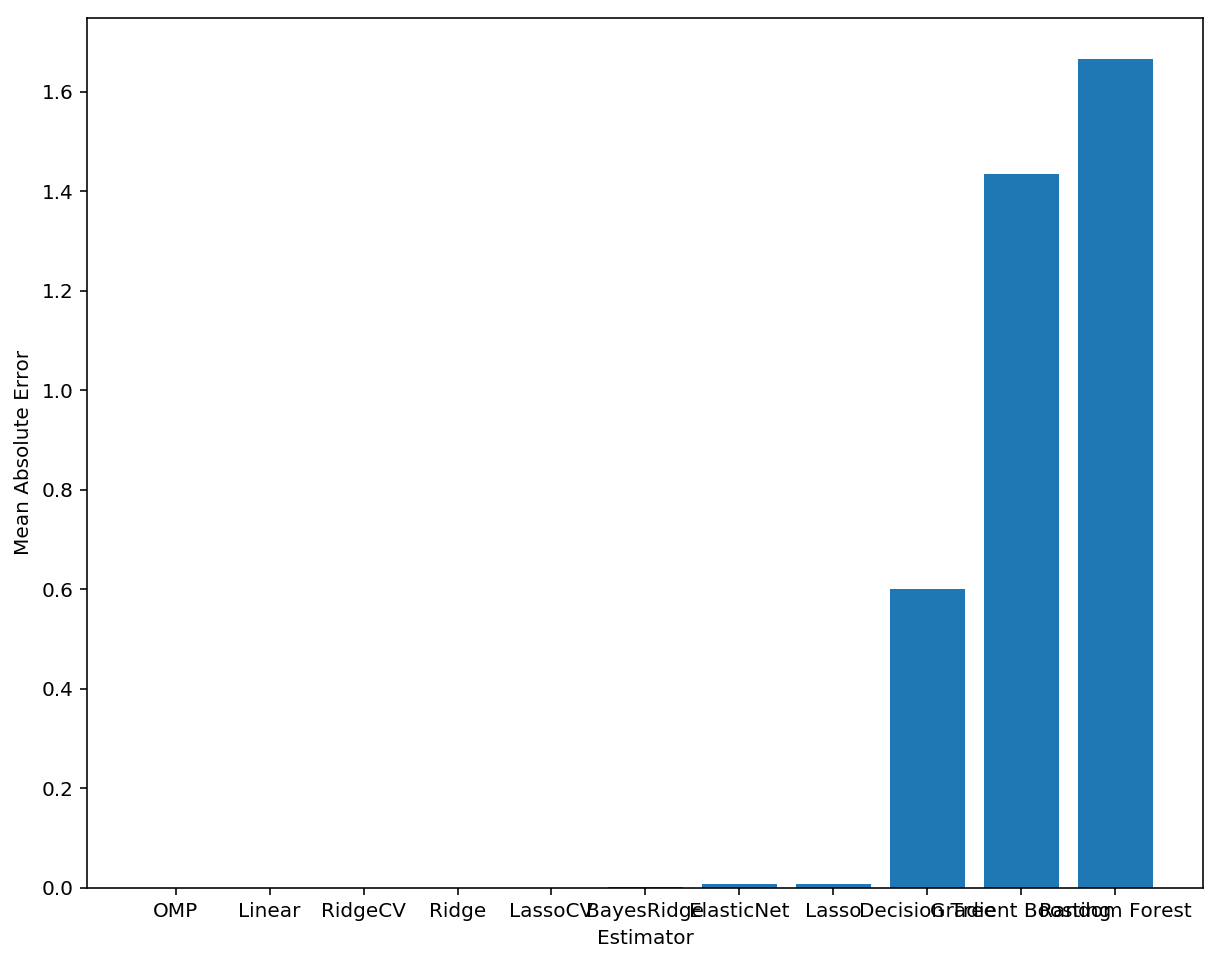

In [25]:
mean_absolute_errors(x_1, y_1)

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.13615e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.13615e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.30443e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=

Model Random Forest Results: 2.057141178547055
Model Gradient Boosting Results: 1.3766801477312054
Model Decision Tree Results: 0.6083009086834507
Model Linear Results: 8.102791339693906e-08
Model Ridge Results: 0.4255293221689699
Model RidgeCV Results: 9.619963407222045e-08
Model Lasso Results: 1857.8122381378641
Model LassoCV Results: 0.011017496354537427
Model ElasticNet Results: 1564.7731231501155
Model BayesRidge Results: 0.0012369889356548887
Model OMP Results: 1.5209393047492625e-13


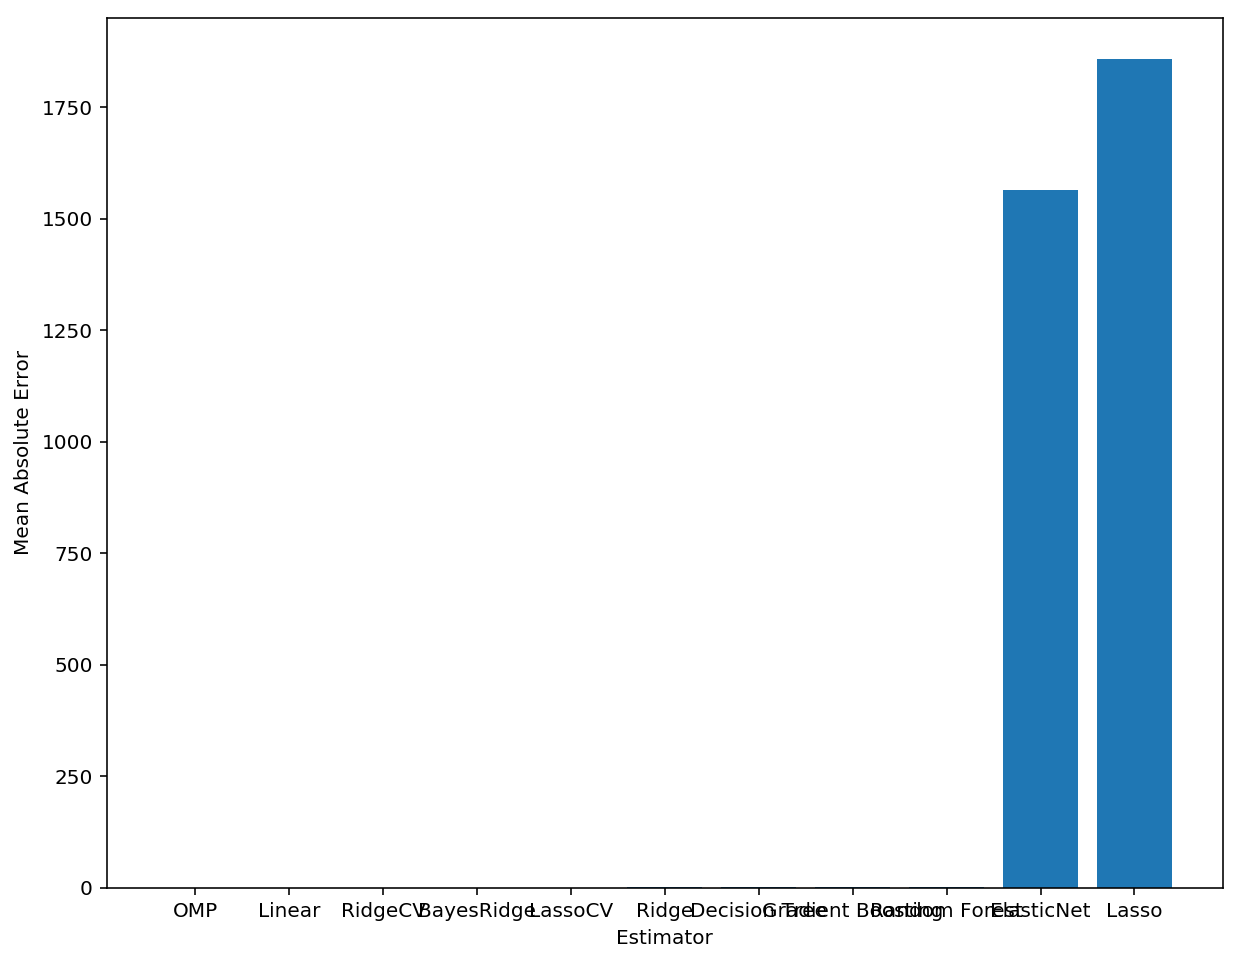

In [26]:
mean_absolute_errors(x_1, y_1_log, True)